In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mplPath
from matplotlib import pyplot
import geopandas as gpd
import pandas as pd
import cartopy.io.shapereader as shpreader
import geodatasets
import xarray as xr
import numpy as np
from geopandas import GeoSeries
from pathlib import Path
from pyproj import Transformer
from shapely.geometry import Point , Polygon, MultiPolygon
from shapely.geometry.multipolygon import MultiPolygon
import shapely.wkt
import shapely.geometry
import shapely
from shapely.ops import nearest_points
from pathlib import Path
import rasterio
import rioxarray
from shapely import wkt
import shapely.wkt
import shapely.geometry

In [2]:
df = pd.read_csv('Output_SolarWind\\df_final_SI_combined_SolarWind_exc.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
gdp = gpd.GeoDataFrame(df, crs='epsg:4326')
gdp = gdp.set_geometry(gdp['geometry'])
print(gdp)

       index  pol_id                                           geometry  \
0          0       0  POLYGON ((100.10833 20.41667, 100.11944 20.416...   
1          1       1  POLYGON ((99.99167 20.36944, 100.00000 20.3694...   
2          2       2  POLYGON ((100.10833 20.37500, 100.11111 20.375...   
3          3       3  POLYGON ((99.95833 20.35556, 99.96389 20.35556...   
4          4       4  POLYGON ((99.91667 20.33889, 99.91944 20.33889...   
...      ...     ...                                                ...   
16259  16259   17001  POLYGON ((101.88889 5.93333, 101.88889 5.92500...   
16260  16260   17002  POLYGON ((101.83611 5.93056, 101.83611 5.92778...   
16261  16261   17003  POLYGON ((101.88889 5.91667, 101.88889 5.90556...   
16262  16262   17004  POLYGON ((101.87500 5.90833, 101.87778 5.90833...   
16263  16263   17005  POLYGON ((101.12778 5.88333, 101.13333 5.88333...   

         area  from_pol_wind_id   wind_SI  wind_area  \
0      8.2634                 1  1.817748  

total available area for wind projects (km2) =  58405.3386


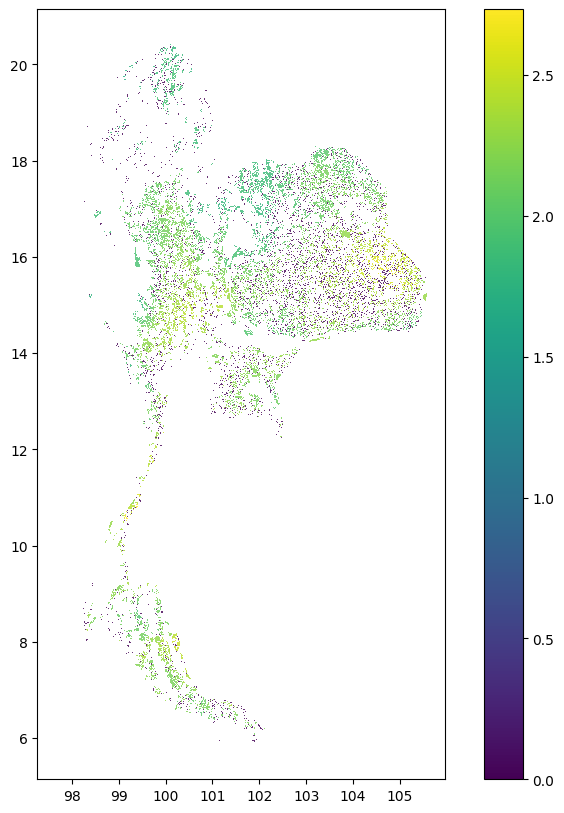

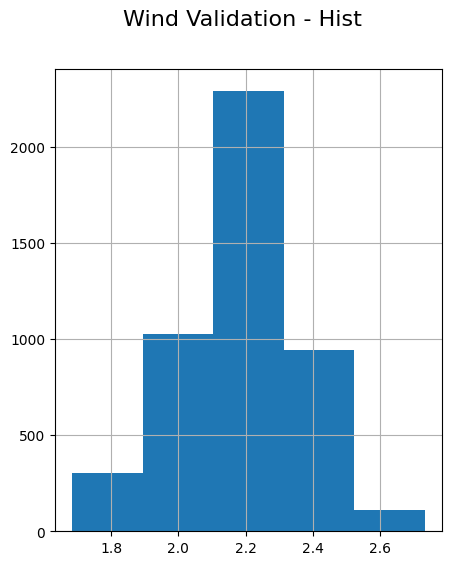

In [3]:
print('total available area for wind projects (km2) = ',gdp['wind_area'].sum())

fig, ax = plt.subplots(figsize=(10,10))
gdp.plot(column='wind_SI',ax = ax,alpha = 0.8,zorder = 0,legend = True)

fig, ax = plt.subplots(figsize=(5,6))
fig.suptitle('Wind Validation - Hist', fontsize=16)
hist = gdp['wind_SI'].loc[gdp['wind_SI']>0].hist(bins=5)

total available area for solar projects (km2) =  84877.5868


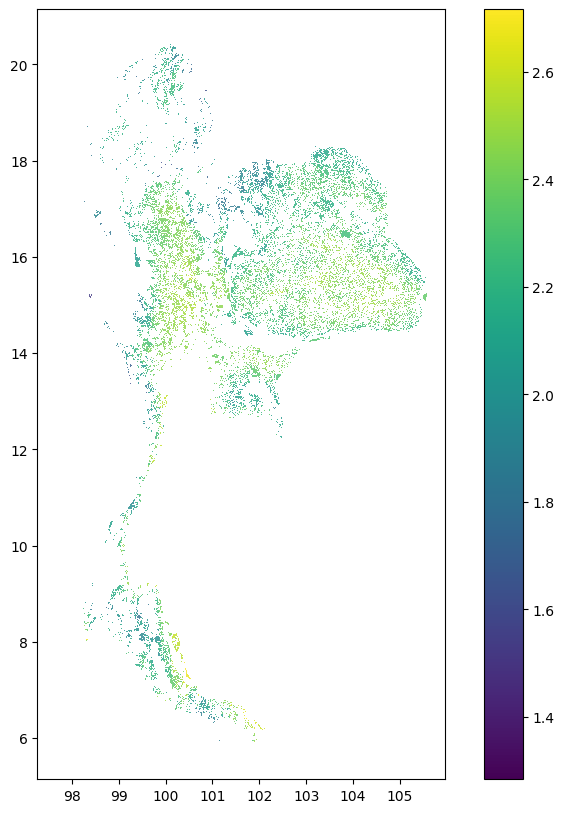

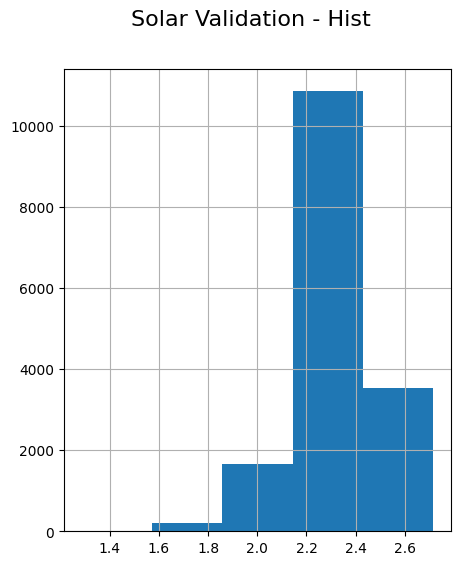

In [4]:
print('total available area for solar projects (km2) = ',gdp['solar_area'].sum())
fig, ax = plt.subplots(figsize=(10,10))
gdp.plot(column='solar_SI',ax = ax,alpha = 0.8,zorder = 0,legend = True)

fig, ax = plt.subplots(figsize=(5,6))
fig.suptitle('Solar Validation - Hist', fontsize=16)
hist = gdp['solar_SI'].loc[gdp['solar_SI']>0].hist(bins=5)